In [1]:
# I am importing only pandas and numpy. Import the rest of libraries (only the necessary ones)
import pandas as pd
import numpy as np
#for split the dataset
from sklearn.model_selection import train_test_split
#for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor   #Decision Tree Regressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
# Set up pipeline 
from sklearn.model_selection import GridSearchCV


some online resources  http://ocw.uc3m.es/ingenieria-informatica/machine-learning-i/decisiontreeshyperparameters.html/skinless_view

In [2]:
TobaccoData = pd.read_csv("Tobacco.csv")
del TobaccoData['Unnamed: 0']
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,bluecol,flanders,1,0,2,14.19054,0.0,0.000000,2
1,inactself,flanders,0,0,3,13.90857,0.0,0.002285,3
2,whitecol,flanders,0,0,1,13.97461,0.0,0.012875,2
3,bluecol,flanders,1,0,2,13.76281,0.0,0.005907,2
4,inactself,flanders,2,0,1,13.80800,0.0,0.021981,2


For this exercise, you will use different variables to predict the expenditure on tobacco. Here is the data dictionary of this dataset:
https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Tobacco.html

In [3]:
# Create dummy variables for the categorical variables, and remove the unncessary columns
# Note: age here is a categorical variable. It represents age group
# You should have a total of 17 columns afterwards (including the response)

occupation = pd.get_dummies(TobaccoData.occupation, prefix = 'occupation', drop_first = True)
region = pd.get_dummies(TobaccoData.region, prefix = 'region', drop_first = True)
age = pd.get_dummies(TobaccoData.age, prefix = 'age', drop_first = True)
TobaccoData = pd.concat([TobaccoData, occupation, region, age], axis = 1)
del TobaccoData['occupation']
del TobaccoData['region']
del TobaccoData['age']
TobaccoData.head()

,nkids,nkids2,nadults,lnx,stobacco,salcohol,occupation_inactself,occupation_whitecol,region_flanders,region_walloon,age_1,age_2,age_3,age_4
0,1,0,2,14.19054,0.0,0.000000,0,0,1,0,0,1,0,0
1,0,0,3,13.90857,0.0,0.002285,1,0,1,0,0,0,1,0
2,0,0,1,13.97461,0.0,0.012875,0,1,1,0,0,1,0,0
3,1,0,2,13.76281,0.0,0.005907,0,0,1,0,0,1,0,0
4,2,0,1,13.80800,0.0,0.021981,1,0,1,0,0,1,0,0


In [4]:
TobaccoData.shape

(2724, 14)

#### We would like to use a Regression Tree model to detect the most important variables affect expenditure on tobacco. Follow necessary steps to develop your Regression Tree, tune it via _Cross-Validation_ and lastly state the most important variable you found with the corresponding MSE of your best model. Your output is stobacco.

In [5]:
# Separate the X and Y

X = TobaccoData.copy() 
del X['stobacco']
y = TobaccoData['stobacco']

#### Set up a 5-fold cross validation to tune the max_depth and max_leaf_nodes arguments simultaneously. Set the random state in the decision tree to be 1.

In [6]:
# Split your data into training and holdout set. Use the random state 1, and 30% hold-out size.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [7]:
# Tune your tree 
decision_tree =  DecisionTreeRegressor(random_state=1) # There is no preprocessing, so we just have one input

paras = {'max_depth': range(2,50), 
        'max_leaf_nodes': range(2,50)} # Discrete uniform distribution between 2 and 50
clf = GridSearchCV(decision_tree, paras, n_jobs = -1, cv = 5) 
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(2, 50),
                         'max_leaf_nodes': range(2, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [8]:
# Report the best parameters and MSE on the test set
print(clf.best_params_)
# This is how we perform prediction
print(mean_squared_error(clf.predict(X_test), y_test))
print(np.sqrt(mean_squared_error(clf.predict(X_test), y_test))) # Calculate RMSE instead

{'max_depth': 2, 'max_leaf_nodes': 4}
0.0005496823796275048
0.023445306132091875


#### Now repeat the procedure, but this time tune the alpha parameter. Feel free to refine your choice to get a better estimate.

In [9]:
# Tune your tree. Use values between 0 to 1e-5.
decision_tree = DecisionTreeRegressor(random_state=1) # There is no preprocessing, so we just have one input

paras = {'ccp_alpha': np.linspace(0, 0.00001, 10)}
clf1 = GridSearchCV(decision_tree, paras, n_jobs = -1, cv = 5) 
clf1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.11111111e-06, 2.22222222e-06, 3.33333333e-06,
       4.44444444e-06, 5.55555556e-06, 6.66666667e-06, 7.77777778e-06,
       8.88888889e-06, 1.

In [10]:
# Report the best parameters and MSE on the test set
print(clf1.best_params_)
# This is how we perform prediction
print(mean_squared_error(clf1.predict(X_test), y_test))
print(np.sqrt(mean_squared_error(clf1.predict(X_test), y_test))) # Calculate RMSE instead

{'ccp_alpha': 1e-05}
0.0005515078450825027
0.02348420416114846


What do you observe?
Answer: The performances are similar. 

#### Now refit the two models (using the training set) with the best parameters respectively, and report the important features from both models

In [11]:
# Refit the two models
grid = DecisionTreeRegressor(max_depth = clf.best_params_['max_depth'],
                      max_leaf_nodes = clf.best_params_['max_leaf_nodes'])
grid1 = DecisionTreeRegressor(ccp_alpha = clf1.best_params_['ccp_alpha'])
grid.fit(X_train, y_train)
grid1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=1e-05, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [12]:
# Report the important features from both models
importance = pd.DataFrame({'feature':X_train.columns.values, 
                           'Model1':grid.feature_importances_,
                          'Model2': grid1.feature_importances_})
importance.sort_values(by = 'Model1', ascending = False)


,feature,Model1,Model2
3,lnx,0.62096,0.580324
12,age_4,0.37904,0.419676
0,nkids,0.00000,0.000000
1,nkids2,0.00000,0.000000
2,nadults,0.00000,0.000000
4,salcohol,0.00000,0.000000
5,occupation_inactself,0.00000,0.000000
6,occupation_whitecol,0.00000,0.000000
7,region_flanders,0.00000,0.000000
8,region_walloon,0.00000,0.000000


What's your observation?

Answer: Both models agree with the top 2 most important features (in the same order). The regularized tree only has two selected predictor, which (might) indicate it's a very small tree, we need to investigate more on that.

#### Also plot your second tree. It should be small enough to plot.

[Text(167.4, 181.2, 'lnx <= 13.334\nmse = 0.001\nsamples = 1906\nvalue = 0.013'),
 Text(83.7, 108.72, 'age_4 <= 0.5\nmse = 0.001\nsamples = 410\nvalue = 0.023'),
 Text(41.85, 36.23999999999998, 'mse = 0.002\nsamples = 224\nvalue = 0.031'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.001\nsamples = 186\nvalue = 0.012'),
 Text(251.10000000000002, 108.72, 'lnx <= 14.04\nmse = 0.0\nsamples = 1496\nvalue = 0.01'),
 Text(209.25, 36.23999999999998, 'mse = 0.001\nsamples = 979\nvalue = 0.012'),
 Text(292.95, 36.23999999999998, 'mse = 0.0\nsamples = 517\nvalue = 0.006')]

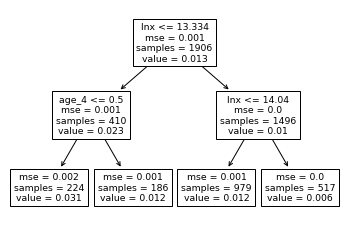

In [13]:
# Draw your tree here
small_clf = DecisionTreeRegressor(max_depth = 2)
small_clf.fit(X_train, y_train)
tree.plot_tree(small_clf, feature_names=X_train.columns.values)

#### Now, let's treat stobacco as a dummy variable to distinguish between those who smoke and who do not. We then use decision tree classifier to identify the most important features that may affect probability of smoking. 

In [14]:
# Create a dummy variable called smoke, that takes the value 0 if stobacco is 0, and 1 otherwise. 
# Delete your stobacco column afterwards
# The smoke variable is now your response

TobaccoData['smoke'] = (TobaccoData['stobacco'] > 0).astype(int)
del TobaccoData['stobacco']
TobaccoData.head(10)

,nkids,nkids2,nadults,lnx,salcohol,occupation_inactself,occupation_whitecol,region_flanders,region_walloon,age_1,age_2,age_3,age_4,smoke
0,1,0,2,14.19054,0.000000,0,0,1,0,0,1,0,0,0
1,0,0,3,13.90857,0.002285,1,0,1,0,0,0,1,0,0
2,0,0,1,13.97461,0.012875,0,1,1,0,0,1,0,0,0
3,1,0,2,13.76281,0.005907,0,0,1,0,0,1,0,0,0
4,2,0,1,13.80800,0.021981,1,0,1,0,0,1,0,0,0
5,3,0,2,14.00313,0.016691,0,1,1,0,0,1,0,0,0
6,0,0,2,13.88680,0.069258,1,0,1,0,0,0,0,1,1
7,1,0,2,14.00711,0.026909,0,0,1,0,0,0,0,0,0
8,0,0,2,14.33985,0.000000,0,1,1,0,1,0,0,0,0
9,0,0,2,13.99883,0.031385,1,0,1,0,0,0,0,1,1


In [15]:
# Re-extract predictors and responses

X1 = TobaccoData.copy() 
del X1['smoke']
y1 = TobaccoData['smoke']

# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 1)

#### Fit the classification trees, follow the same tunings above. Report the important variables for the two models. Use recall as your evaluation metric. You will need to do some customerization on the scoring part. See https://stackoverflow.com/questions/50933561/how-to-specify-positive-label-when-use-precision-as-scoring-in-gridsearchcv for more information.

In [16]:
# Tune your tree with max_depth and max_leaf_nodes
decision_tree = DecisionTreeClassifier(random_state=1) 

paras = {'max_depth': range(2,50), # Discrete uniform distribution between 2 and 50
        'max_leaf_nodes': range(2,50),
        'criterion': ['gini', 'entropy']} 
clf2 = GridSearchCV(decision_tree, paras, n_jobs = -1, cv = 5) 
clf2.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                  

In [17]:
# Report the best parameters and the recall value on the test set
# Recall = TruePositives / (TruePositives + FalseNegatives)

print(clf2.best_params_)
# This is how we perform prediction
print(recall_score(y1_test, clf2.predict(X1_test)))
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8}
0.0891089108910891


In [18]:
# Tune your tree with ccp_alpha 
decision_tree = DecisionTreeClassifier(random_state=1) # There is no preprocessing, so we just have one input

paras = {'ccp_alpha': np.linspace(0, 0.00001, 10),
        'criterion': ['gini', 'entropy']}
clf3 = GridSearchCV(decision_tree, paras, n_jobs = -1, cv = 5) 
clf3.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.11111111e-06, 2.22222222e-06, 3.33333333e-06,
       4.44444444e-0

In [19]:
# Report the best parameters and the recall value on the test set

print(clf3.best_params_)
# This is how we perform prediction
print(recall_score(y1_test, clf3.predict(X1_test)))

{'ccp_alpha': 0.0, 'criterion': 'entropy'}
0.44884488448844884


What's your observation? 

Answer: From the recall value, it is clearly that the first decisiton tree model with 'max_depth'=4 and 'max_leaf_nodes'=8 is not perform well. Even the second model 'ccp_alpha'=0 only has 46.9% of recall value. The result means that among all the actual positive outputs, we only prodict correctly with less than half of them. 

#### Now refit the two models with the best parameters, and get the important features. 

In [20]:
# Refit the two models
grid2 = DecisionTreeClassifier(max_depth = clf2.best_params_['max_depth'],
                      max_leaf_nodes = clf2.best_params_['max_leaf_nodes'],
                             criterion = clf2.best_params_['criterion'])
grid3 = DecisionTreeClassifier(ccp_alpha = clf3.best_params_['ccp_alpha'],
                              criterion = clf3.best_params_['criterion'])
grid2.fit(X1_train, y1_train)
grid3.fit(X1_train, y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
# Important features
importance = pd.DataFrame({'feature':X1_train.columns.values, 
                           'Model3':grid2.feature_importances_,
                          'Model4': grid3.feature_importances_})
importance.sort_values(by = 'Model3', ascending = False)

,feature,Model3,Model4
12,age_4,0.403999,0.017530
3,lnx,0.256018,0.422727
4,salcohol,0.194153,0.327448
2,nadults,0.145830,0.033886
0,nkids,0.000000,0.058920
1,nkids2,0.000000,0.005958
5,occupation_inactself,0.000000,0.019148
6,occupation_whitecol,0.000000,0.012439
7,region_flanders,0.000000,0.023206
8,region_walloon,0.000000,0.026398


What's your observation?

Answer: It shows Model 3 is quite simple, with only 4 important features. However, Model 4 shows a different result, even the important features are different. 